# Project 4 - Regression Analysis

## Dataset: Suicide Rates Overview

### Osama Hassen

In [3]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
#plt.rcParams.keys()

In [4]:
# Import dataset
#path ='dataset/'
#path = '../input/'
columns = [0,1,2,3,4,5,6,9,10,11] #Only using columns of interest
path = './'
df = pd.read_csv(path+'master.csv', usecols = columns)
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (27820, 10)



,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### Data Exploration

In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [6]:
#The summary above shows that pandas is not considering gdp_for_year as a numerical feature; perhaps due to the commas.

#Removing commas from gdp_for_year and setting as float
for m in df.index:
    d=df.loc[m, ' gdp_for_year ($) ']
    e=float(d.replace(',',''))
    df.loc[m, ' gdp_for_year ($) '] = e
    

In [9]:
print(type(df[' gdp_for_year ($) ']))
print(type(df.loc[0,' gdp_for_year ($) ']))
df=df.astype({' gdp_for_year ($) ':'float64'}, copy=False)
df.info()
df.describe()

<class 'pandas.core.series.Series'>
<class 'float'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  float64
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


### Check for missing values

Text(0.5, 1.0, 'Missing value in the dataset')

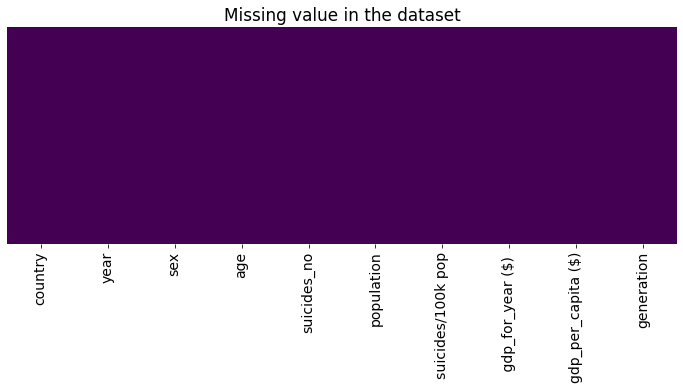

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

##### No missing data in columns of interest

### Question 1
 Plot a heatmap of Pearson correlation matrix of dataset columns. Report which
features have the highest absolute correlation with the target variable and what
that implies.

<AxesSubplot:>

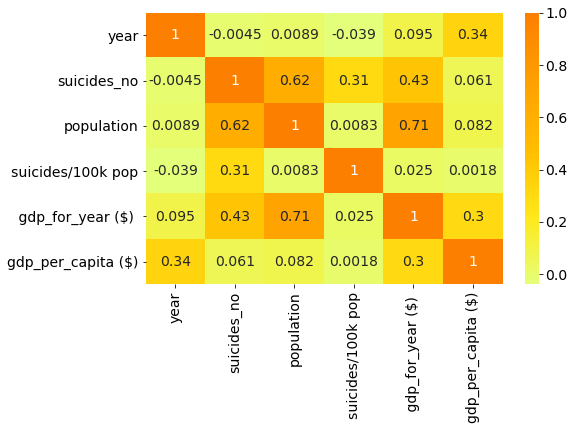

In [11]:


# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

##### Target variables are suicides_no & suicides/100k pop. suicide_no has the highest correlation with 'population' (at 0.62) followed by gdp_for_year (at 0.43).  The correlation with suicide rate (suicides/100k pop) is ignored as a trivial correlation since it is a function of suicide_no. Since this is a raw number, the correlation with 'population' is intuitive. The larger the population in a given slice (country, age group, year, generation), the larger the suicide number is expected to be.  A good indication of this the absense of the correlation with population in the suicide rate since the size of the population is taken out of consideration.  What is not intuitive is the correlation with gdp_for_year. This (potentially) means that the higher the overall gdp of a country for a given year, the higher the suicide rate is expected to be. Note that gdp_for_year has a high correlation with population. This explains the lack of correlation between suicide rate and gdp_for_year (since population is taken out of the suicide number) and also the lack of correlation between suicides_no and gdp_per_capita (since population is taken out of the gdp number).

##### 'suicides/100k pop' has the highest correlation with suicide_no (at 0.31) which, again, can be dismissed as part of the calculation and  deoesn't tell us anything new about the data. In fact, the suicide rate is designed to remove the influence of the population of the slice of data on the suicide number (i.e. normalize against population size) so it makes sense that it has a decent correlation with the raw suicide number and almost no correlation with population (the removed influence)

# INCLUDE IN REPORT THAT DATA WAS EXPLORED

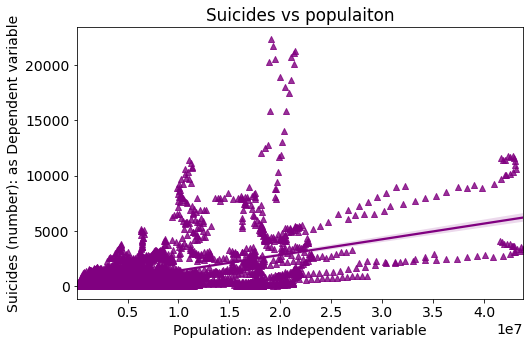

In [12]:
#Scatter plot of suicide numbers vs. population

sns.regplot(x='population',y='suicides_no',data=df,marker='^',color='purple')
plt.xlabel('Population: as Independent variable')
plt.ylabel('Suicides (number): as Dependent variable')
plt.title('Suicides vs populaiton');

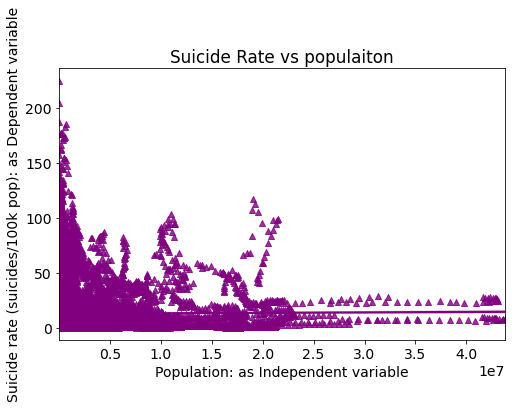

In [13]:
#Scatter plot of suicide rate vs. population

sns.regplot(x='population',y='suicides/100k pop',data=df,marker='^',color='purple')
plt.xlabel('Population: as Independent variable')
plt.ylabel('Suicide rate (suicides/100k pop): as Dependent variable')
plt.title('Suicide Rate vs populaiton');

### Question 2
Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness?

In [14]:

# Numerical features: Year, Population, gdp/capita, gdp/year

def threeplots(data):
    f= plt.figure(figsize=(20,7))
    ax1=f.add_subplot(131)
    sns.histplot(data,bins=40,color='r',ax=ax1)
    ax1.set_title('Histogram of %s' %data.name)
    plt.xticks(rotation=45, fontsize=12)
    
    ax2=f.add_subplot(132)
    sns.histplot(data,bins=40,color='b',ax=ax2, log_scale=True)
    ax2.set_title('Histogram of %s (log10)' %data.name)
    plt.xticks(rotation=45, fontsize=12)
    
    data_bc, lam, ci= boxcox(data, alpha=.05)
    ax3=f.add_subplot(133)
    sns.histplot(data_bc,bins=40,color='g',ax=ax3)
    ax3.set_title('Histogram of %s (Box-Cox)' %data.name)
    plt.xticks(rotation=45, fontsize=12)

In [9]:
ncolumns= [df['year'], df['population'], df['gdp_per_capita ($)'], df[' gdp_for_year ($) ']]

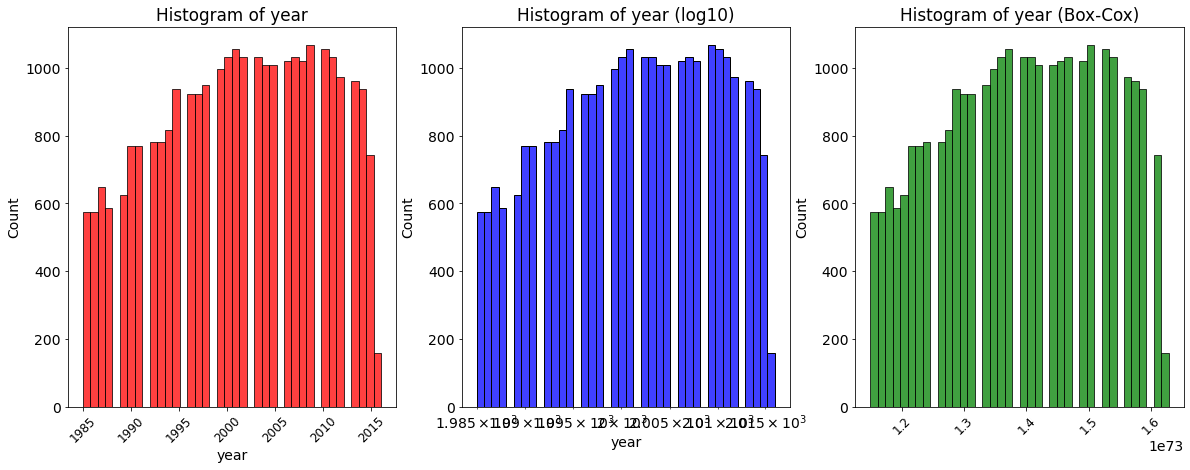

In [16]:
threeplots(ncolumns[0])

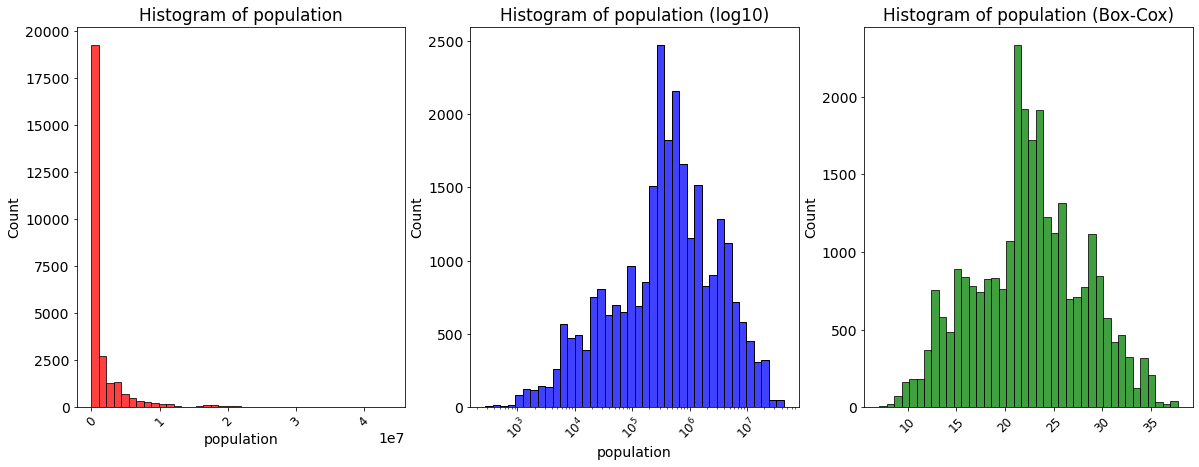

In [17]:
threeplots(ncolumns[1])

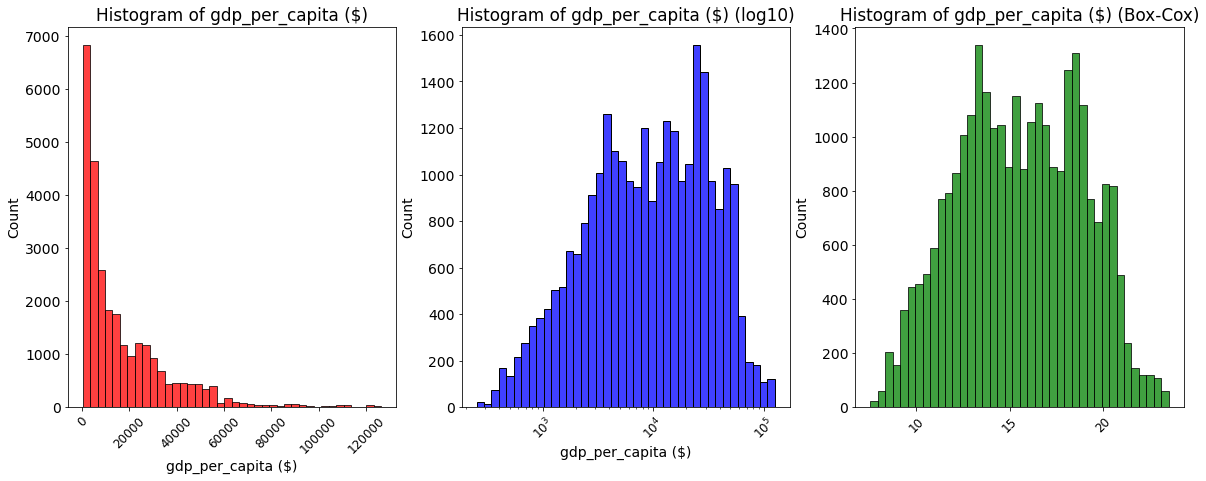

In [18]:
threeplots(ncolumns[2])

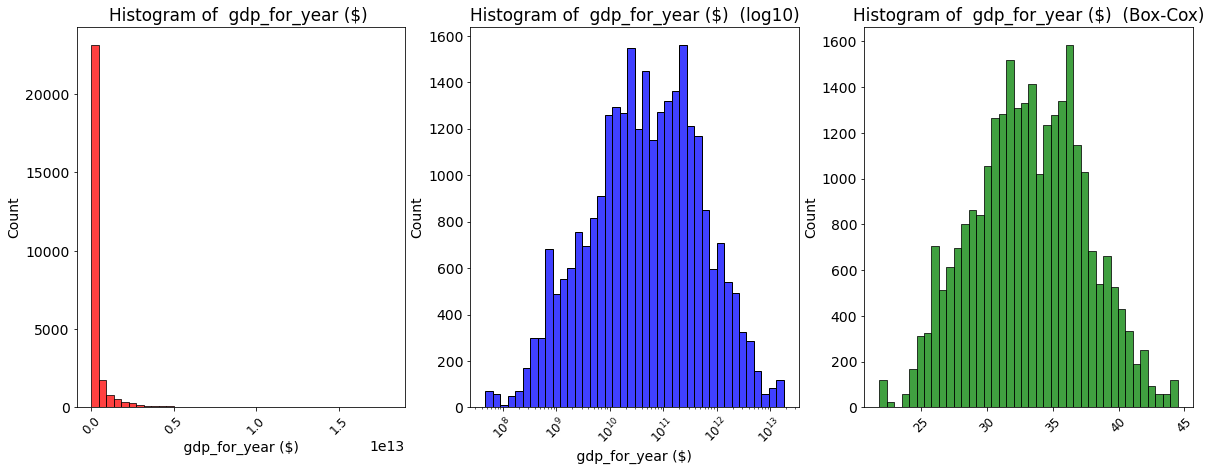

In [19]:
threeplots(ncolumns[3])

In [20]:
#Check for Normality of each dataset, its log transform and Box-Cox transform using Shapiro-Wilk Test:
from scipy.stats import shapiro

def chnorm(dsets):
    for i in dsets:
        stat, p = shapiro(i)
        print(i.name, 'Raw data stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')
        
        #repeat test for log10 transformation
        stat, p = shapiro(np.log10(i))
        print(i.name, 'log10 transformation stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')        
   
        #repeat test for Box-Cox transformation
        data_bc, lam, ci= boxcox(i, alpha=.05)
        stat, p = shapiro(data_bc)
        print(i.name, 'Box-Cox transformation stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')

In [21]:
chnorm(ncolumns)

C:\Users\ohass\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


year Raw data stat=0.963, p=0.000
Probably NOT Gaussian Distribution

year log10 transformation stat=0.913, p=0.000
Probably NOT Gaussian Distribution

year Box-Cox transformation stat=nan, p=1.000
Probably Gaussian Distribution

population Raw data stat=0.491, p=0.000
Probably NOT Gaussian Distribution

population log10 transformation stat=0.982, p=0.000
Probably NOT Gaussian Distribution

population Box-Cox transformation stat=0.993, p=0.000
Probably NOT Gaussian Distribution

gdp_per_capita ($) Raw data stat=0.786, p=0.000
Probably NOT Gaussian Distribution

gdp_per_capita ($) log10 transformation stat=0.980, p=0.000
Probably NOT Gaussian Distribution

gdp_per_capita ($) Box-Cox transformation stat=0.985, p=0.000
Probably NOT Gaussian Distribution

 gdp_for_year ($)  Raw data stat=0.304, p=0.000
Probably NOT Gaussian Distribution

 gdp_for_year ($)  log10 transformation stat=0.994, p=0.000
Probably NOT Gaussian Distribution

 gdp_for_year ($)  Box-Cox transformation stat=0.996, p=0.

In [22]:
#Check for Normality of each dataset, its log transform and Box-Cox transform using Probability Plot (Quantile-Quantile Plot):
import scipy.stats as stats
import pylab

def prplot(dsets):
    for i in dsets:
        stats.probplot(i, dist='norm', plot=pylab, rvalue=True)
        print('Probability plot for ', i.name)
        pylab.show()

        #repeat test for log10 transformation
        stats.probplot(np.log10(i), dist='norm', plot=pylab, rvalue=True)
        print('Probability plot for log10 of', i.name)
        pylab.show()
    
        #repeat test for Box-Cox transformation
        data_bc, lam, ci= boxcox(i, alpha=.05)
        stats.probplot(data_bc, dist='norm', plot=pylab, rvalue=True)
        print('Probability plot for Box-Cox of', i.name)
        pylab.show()
               

Probability plot for  year


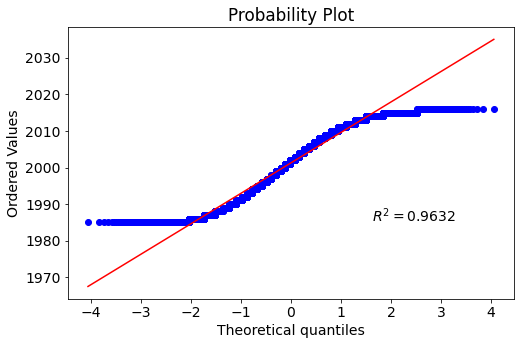

Probability plot for log10 of year


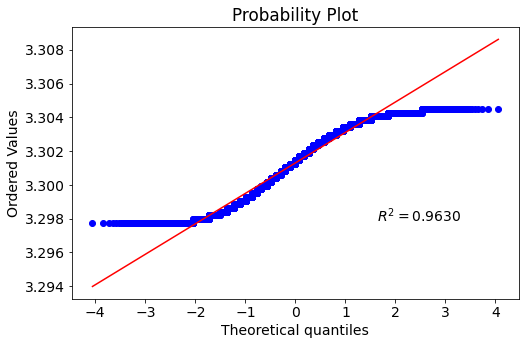

Probability plot for Box-Cox of year


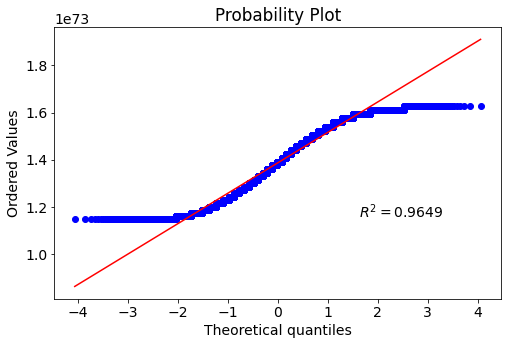

Probability plot for  population


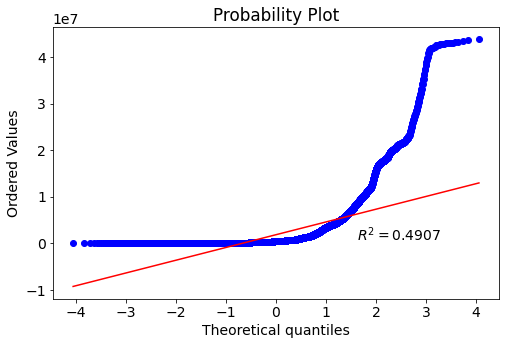

Probability plot for log10 of population


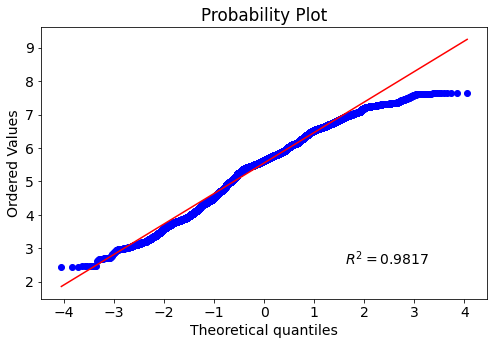

Probability plot for Box-Cox of population


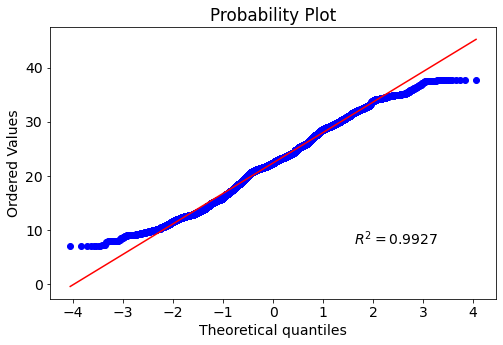

Probability plot for  gdp_per_capita ($)


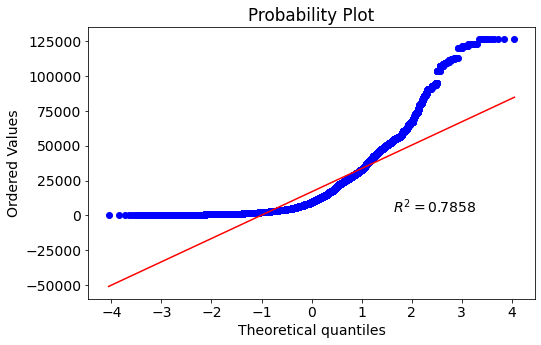

Probability plot for log10 of gdp_per_capita ($)


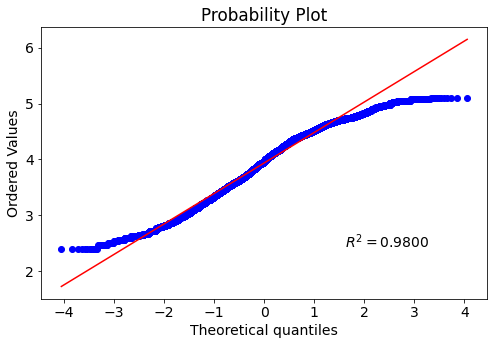

Probability plot for Box-Cox of gdp_per_capita ($)


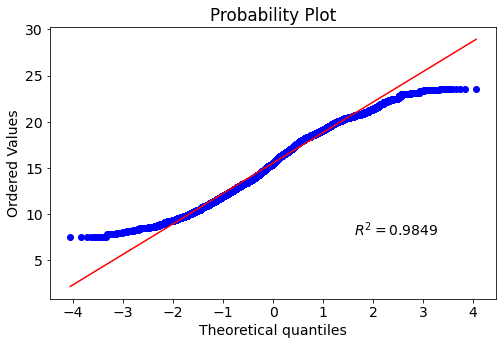

Probability plot for   gdp_for_year ($) 


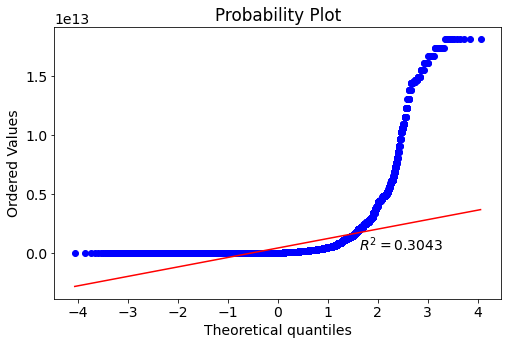

Probability plot for log10 of  gdp_for_year ($) 


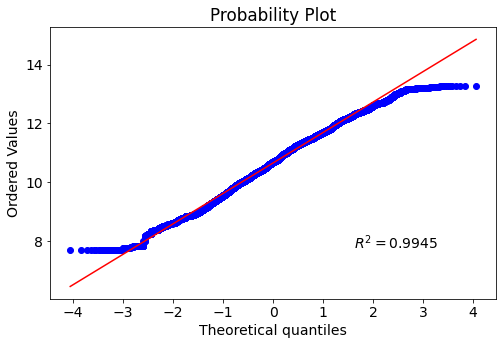

Probability plot for Box-Cox of  gdp_for_year ($) 


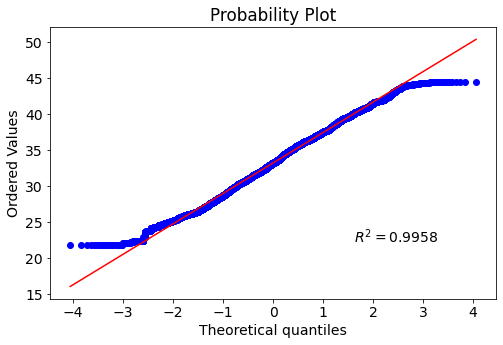

In [23]:
prplot(ncolumns)

#### Box-Cox or log transformation can be applied to high skewness distributions to get them closer to Normality. Normality is an important asumption for many statistical analysis methods.  The Shapiro-Wilk Test shows that none of the features and most transformations aren't a good fit for Normal distribution. The only exception is the Box-Cox transformation of 'year'.

#### The Probability Plots allow us to rank the transformations for each feature and select the closest to Normality.  The Box-Cox transformation is the best to get all features closes to Normaility and therefore will be used for all numeric features.



In [10]:
#adding Box-Cox Tranformations of number features to the df as new columns
df2=df.copy()
#ncolumns= [df['year'], df['population'], df['gdp_per_capita ($)'], df[' gdp_for_year ($) ']]
yr_bc, ylam, yci= boxcox(ncolumns[0], alpha=.05)
pop_bc, poplam, popci= boxcox(ncolumns[1], alpha=.05)
gdpc_bc, gdpclam, gdpcci= boxcox(ncolumns[2], alpha=.05)
gdpyr_bc, gdpyrlam, gdpyrci= boxcox(ncolumns[3], alpha=.05)

#df2['yr_bc', 'pop_bc', 'gdpc_bc', 'gdpyr_bc'] = [yr_bc, pop_bc, gdpc_bc, gdpyr_bc]

df2['yr_bc'] = yr_bc
df2['pop_bc'] = pop_bc
df2['gdpc_bc'] = gdpc_bc
df2['gdpyr_bc'] = gdpyr_bc
df2.info

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log method

(0.0, 1000.0)

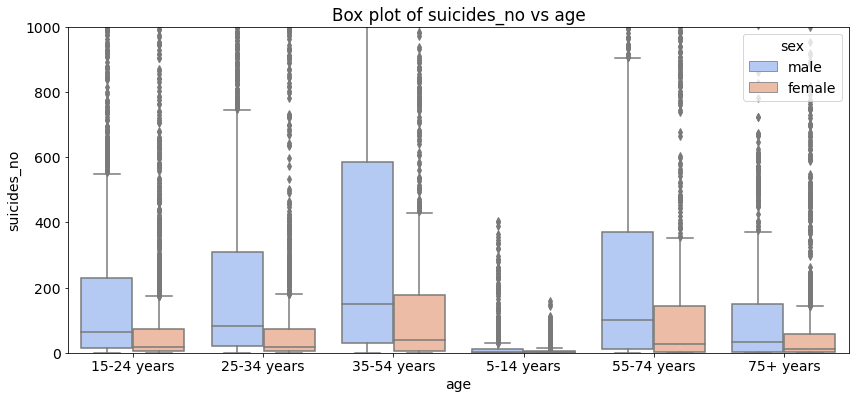

In [25]:
#Question 3
'''Inspect box plot of categorical features vs target variable. What intuition do you
get?'''

plt.figure(figsize=(14,6))
sns.boxplot(x='age', y='suicides_no',hue='sex',data=df.sort_values('age'),palette='coolwarm')
plt.title('Box plot of suicides_no vs age')
plt.ylim(0, 1000)


(0.0, 1000.0)

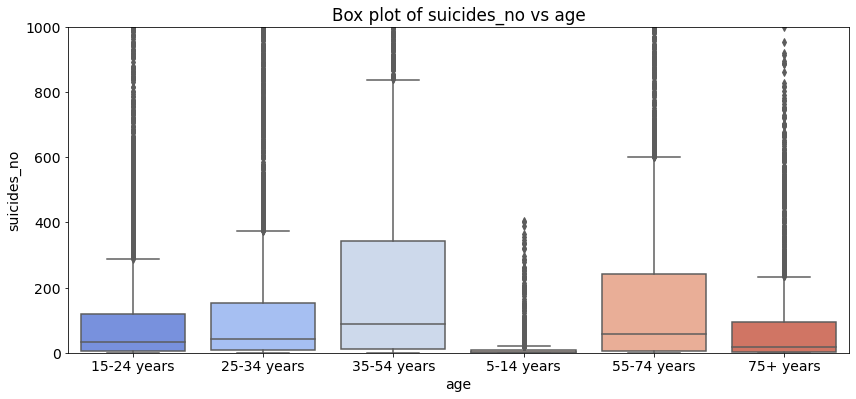

In [26]:
plt.figure(figsize=(14,6))
sns.boxplot(x='age', y='suicides_no', data=df.sort_values('age'),palette='coolwarm')
plt.title('Box plot of suicides_no vs age')
plt.ylim(0, 1000)


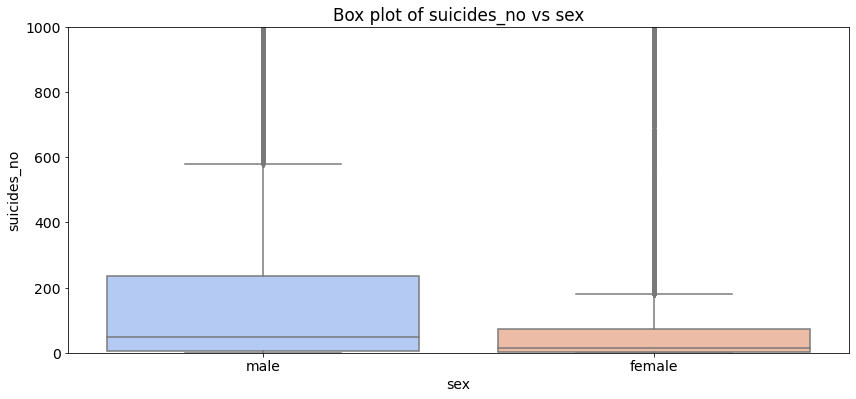

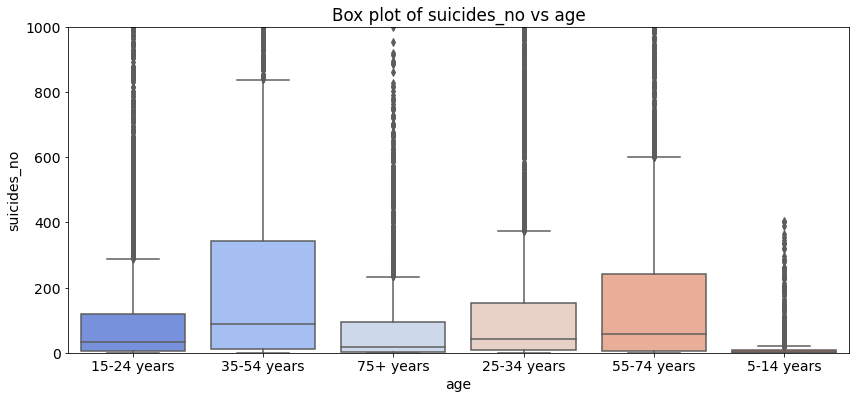

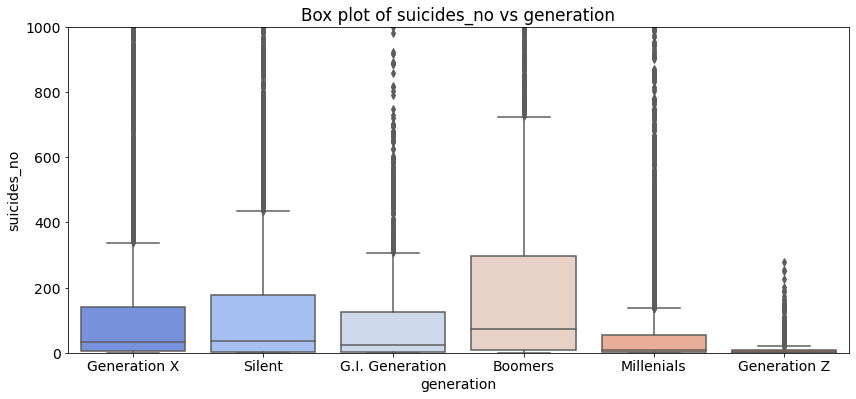

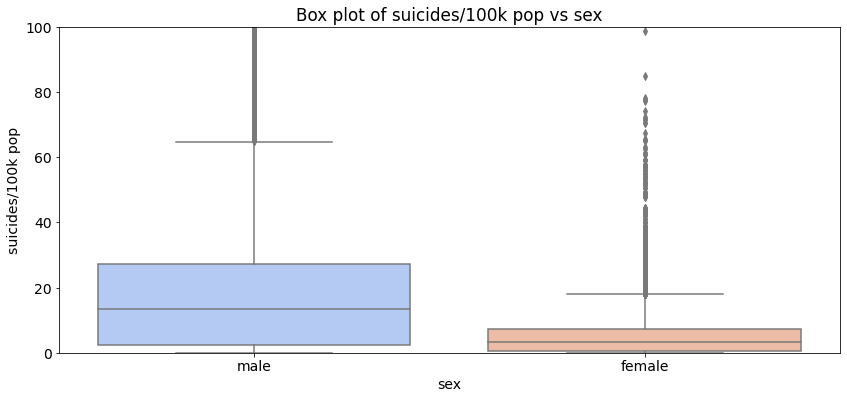

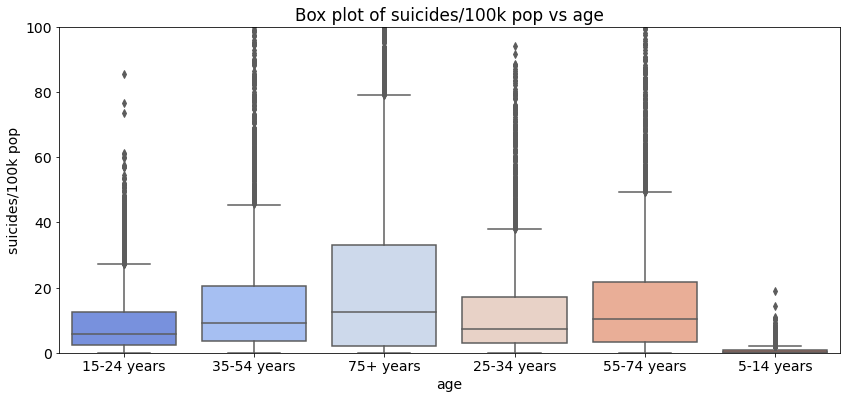

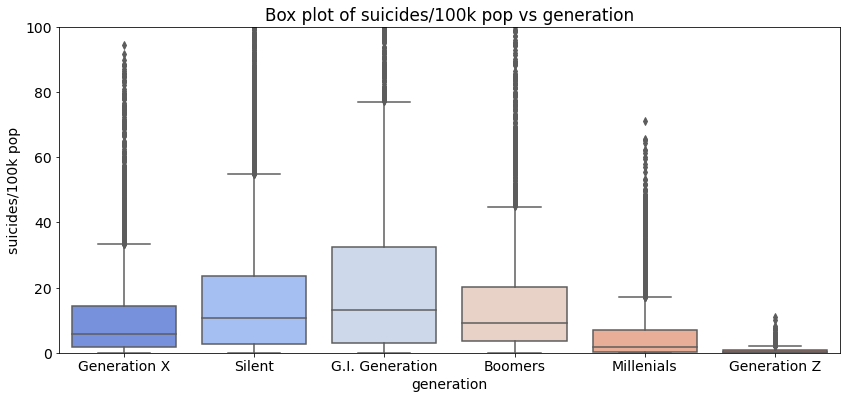

In [27]:
targets = ['suicides_no', 'suicides/100k pop']
categories = ['sex', 'age', 'generation']

for i in targets:
    for j in categories:
        plt.figure(figsize=(14,6))
        sns.boxplot(x=j, y=i, data=df,palette='coolwarm')
        plt.title('Box plot of %s vs %s' % (i, j))
        if i == 'suicides_no':
            plt.ylim(0, 1000)
        else:
            plt.ylim(0, 100)



#### Project only considering suicide rate as target. Both targets used just to explore difference

### Question 5
For the suicide rate dataset, pick the top 10 countries that have the longest time-span of records (in terms of years). Plot the suicide rate (“suicides/100k pop”)
against time for different age groups and gender, and explain your observations
(Hint: try seaborn.relplot)

In [11]:


top10_span_yrs = ['Austria', 'Grenada', 'Iceland', 'Mauritius', 'Netherlands', 'Thailand', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Belgium']
#t10_df=df.query("country in ['Austria', 'Grenada', 'Iceland', 'Mauritius', 'Netherlands', 'Thailand', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Belgium']")
t10_df2=df2.query("country in ['Austria', 'Grenada', 'Iceland', 'Mauritius', 'Netherlands', 'Thailand', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Belgium']")
t10_df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
264,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,2.40924e+08,3850,Generation X
265,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,2.40924e+08,3850,Boomers
266,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,2.40924e+08,3850,Silent
267,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,2.40924e+08,3850,Generation X
268,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,2.40924e+08,3850,G.I. Generation


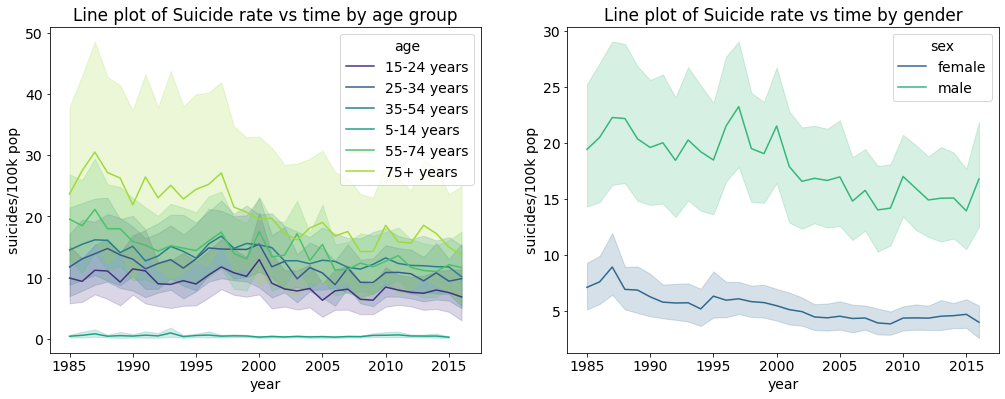

In [29]:
#Plot the suicide rate (“suicides/100k pop”) vs time for different age groups and gender, and explain your observations

f = plt.figure(figsize=(17,6))
ax = f.add_subplot(121)
sns.lineplot(x='year',y='suicides/100k pop',data=t10_df2,palette='viridis',hue='age',ax=ax)
ax.set_title('Line plot of Suicide rate vs time by age group')

ax = f.add_subplot(122)
sns.lineplot(x='year',y='suicides/100k pop',data=t10_df2,palette='viridis',hue='sex')
ax.set_title('Line plot of Suicide rate vs time by gender')
plt.savefig('sc.png');

#### In the filtered data (top 10 countries with data time span), the overall trend of suicide rates over the years is a downward trend for (almost) all age groups and both genders. In the plot by age group, seniors in the 75+ age group seem to commit suicides at a consistently higher rate than younger adults despite the downward trend. The rate is lowest for the youngest age group (5-14 years) and remains relatively flat over time. The other 4 age groups have suicide rates that fall in between the other 2; ranging approximately between 10 and 20 suicides per 100,000 people.

#### The suicide rate by gender group shows that males commit suicide at approximately 3 times the rate of females with both having an overall downard trend over time.

### Question 7
Can you explain a trade-off
here (between one-hot and label encoding)? (Hint: let us assume we perform linear regression, what information does one-hot
encoding discard, and what assumption should hold strongly if we perform the scalar
encoding instead?) (Question 7)
For the suicide rate dataset, the number of unique countries for the variable “country” is
pretty high. We suggest you to group these countries into same continent countries such
as Europe, North America, South America, Middle East and Asia. Using a new variable
with lower number of classes in this category, you may proceed with one-hot encoding

In [13]:


path = './'
ccdf = pd.read_csv(path+'continent_country.csv')
print(ccdf.head())
print(df.shape)
print(ccdf.shape)



  Continent   Country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina
(27820, 10)
(194, 2)


#### Numerical (or label) encoding has the advantage of maintaining the granularity of the data within a single column. However, the fact that categories are changed to integers means that the model will "rank" the categories when there is no actual ranking to the values. 
#### One-hot encoding gets rid of the issue of ranking categories but the trade off is that, since the feature in question will be converted from a single column to multiple 0/1 columns (one for each unique value), it creates many dummy variables for the given feature. This in turn causes a false high correlation between those columns/features creating a multicollinearity problem.

In [14]:
#Creating n_df and adding 'continent' field
n_df=df2.copy()

for n in ccdf.index:
    x=ccdf.loc[n,'Country']
    y=ccdf.loc[n,'Continent']
    n_df.loc[n_df['country'] == x,'continent'] = str(y)
       

n_df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,continent
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,6.30671e+10,2309,Generation X,Asia
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,6.30671e+10,2309,Silent,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,6.30671e+10,2309,Generation Z,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,6.30671e+10,2309,Generation Z,Asia
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,6.30671e+10,2309,Boomers,Asia


In [15]:
ndf=n_df.copy()
#ndf= ndf.drop(['country'], axis=1) 
ndf.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,2.15662e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,2.15662e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,2.15662e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,2.15662e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,2.15662e+09,796,Boomers,Europe


### Label encoding will be used for 'age' since ranking the ages is appropriate in this case. 

In [16]:
### Label encoding will be used for 'age' since ranking the ages is appropriate in this case. 
#5-14 years = '0'
#15-24 years = '1'
#25-34 years = '2'
#35-54 years = '3'
#55-74 years = '4'
#75+ years = '5'

age_list=list(ndf.age.unique())
df_encode_age=ndf.copy()
for j in ndf.index:
    d=df_encode_age.loc[j, 'age']
    if d == '5-14 years':
        df_encode_age.loc[j, 'age'] = int(0)
    elif d== '15-24 years':
        df_encode_age.loc[j, 'age'] = int(1)
    elif d== '25-34 years':
        df_encode_age.loc[j, 'age'] = int(2)
    elif d== '35-54 years':
        df_encode_age.loc[j, 'age'] = int(3)
    elif d== '55-74 years':
        df_encode_age.loc[j, 'age'] = int(4)
    elif d== '75+ years':
        df_encode_age.loc[j, 'age'] = int(5)

df_encode_age.age.unique()


array([1, 3, 5, 2, 4, 0], dtype=object)

In [17]:
df_encode_age = df_encode_age.astype({'age':'int8'}, copy=False)
df_encode_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  int8   
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  continent           25890 non-null  object 
dtypes: float64(1), int64(4), int8(1), object(5)
memory usage: 2.1+ MB


<AxesSubplot:>

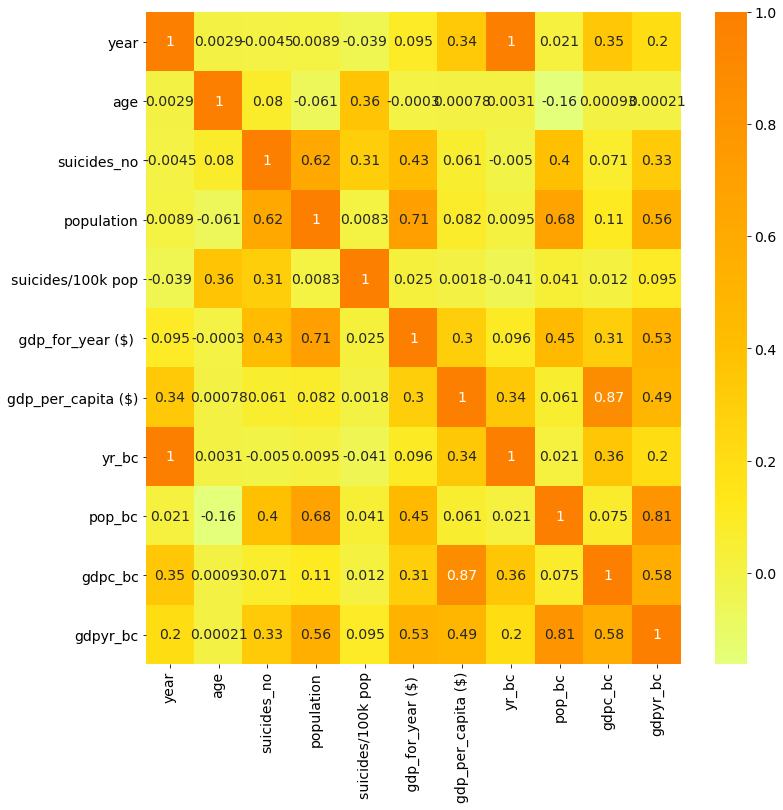

In [107]:
#hist_age=df_encode_age.hist(column='age')

# correlation plot
corr_age = df_encode_age.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_age, cmap = 'Wistia', annot= True)

In [18]:
# Dummy variable
categorical_columns = ['continent','sex', 'generation']
df_encode = pd.get_dummies(data = df_encode_age, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [37]:
# Lets verify the dummy variable process
print('Columns in original data frame:\n',ndf.columns.values)
print('\nNumber of rows and columns in the dataset:',ndf.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
df_encode.info()
df_encode.head()

Columns in original data frame:
 ['country' 'year' 'sex' 'age' 'suicides_no' 'population'
 'suicides/100k pop' ' gdp_for_year ($) ' 'gdp_per_capita ($)'
 'generation' 'yr_bc' 'pop_bc' 'gdpc_bc' 'gdpyr_bc' 'continent']

Number of rows and columns in the dataset: (27820, 15)

Columns in data frame after encoding dummy variable:
 ['country' 'year' 'age' 'suicides_no' 'population' 'suicides/100k pop'
 ' gdp_for_year ($) ' 'gdp_per_capita ($)' 'yr_bc' 'pop_bc' 'gdpc_bc'
 'gdpyr_bc' 'continent_Asia' 'continent_Europe' 'continent_North America'
 'continent_Oceania' 'continent_South America' 'sex_male'
 'generation_G.I. Generation' 'generation_Generation X'
 'generation_Generation Z' 'generation_Millenials' 'generation_Silent']

Number of rows and columns in the dataset: (27820, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      -------------- 

,country,year,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),yr_bc,pop_bc,...,continent_Europe,continent_North America,continent_Oceania,continent_South America,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,Albania,1987,1,21,312900,6.71,2.156625e+09,796,1.174942e+73,21.567237,...,1,0,0,0,1,0,1,0,0,0
1,Albania,1987,3,16,308000,5.19,2.156625e+09,796,1.174942e+73,21.524951,...,1,0,0,0,1,0,0,0,0,1
2,Albania,1987,1,14,289700,4.83,2.156625e+09,796,1.174942e+73,21.361340,...,1,0,0,0,0,0,1,0,0,0
3,Albania,1987,5,1,21800,4.59,2.156625e+09,796,1.174942e+73,15.118446,...,1,0,0,0,1,1,0,0,0,0
4,Albania,1987,2,9,274300,3.28,2.156625e+09,796,1.174942e+73,21.216097,...,1,0,0,0,1,0,0,0,0,0


### Question 8
Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more-or-less look like
standard normally distributed data: Gaussian with zero mean and unit variance. If a feature has a variance that is orders of magnitude larger than others, it might dominate the
objective function and make the estimator unable to learn from other features correctly
as expected.
Standardize feature columns and prepare them for training. 

In [19]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler

#df_nf=df_encode[['age', 'yr_bc', 'pop_bc', 'gdpc_bc', 'gdpyr_bc']].copy()  #numerical and scalar encoded columns to be Standardized
#df_tar=df_encode[['suicides/100k pop']].copy()  #target column to be standardized
#
#scaler = StandardScaler()
#nft_sc_arr = scaler.fit_transform(df_nf) #numerical feature scaler
#targ_sc_arr = scaler.fit_transform(df_tar) #target scaler


In [39]:
ft0=['age', 'yr_bc', 'pop_bc', 'gdpc_bc', 'gdpyr_bc']  #numerical and scalar encoded columns to be Standardized

preprocess = make_column_transformer(
    (StandardScaler(),ft0),
    remainder='passthrough')

ft_res = preprocess.fit_transform(df_encode[ft0])


In [40]:
print(type(ft_res))
print(ft_res.shape)
ft_res[:10]

<class 'numpy.ndarray'>
(27820, 5)


array([[-0.88057409, -1.61197582, -0.1492128 , -1.74474794, -1.25559915],
       [ 0.29127816, -1.61197582, -0.15670966, -1.74474794, -1.25559915],
       [-0.88057409, -1.61197582, -0.18571623, -1.74474794, -1.25559915],
       [ 1.4631304 , -1.61197582, -1.29252015, -1.74474794, -1.25559915],
       [-0.29464797, -1.61197582, -0.21146648, -1.74474794, -1.25559915],
       [ 1.4631304 , -1.61197582, -1.09946497, -1.74474794, -1.25559915],
       [ 0.29127816, -1.61197582, -0.20380697, -1.74474794, -1.25559915],
       [-0.29464797, -1.61197582, -0.24167024, -1.74474794, -1.25559915],
       [ 0.87720428, -1.61197582, -0.52774443, -1.74474794, -1.25559915],
       [-1.46650021, -1.61197582, -0.15210681, -1.74474794, -1.25559915]])

In [20]:
#Creating a df with standardized features
std_ft_df = pd.DataFrame(ft_res, columns={'age_std', 'yr_bc_std', 'pop_bc_std', 'gdpc_bc_std', 'gdpyr_bc_std'})
print(std_ft_df.head())
std_ft_df.info()

NameError: name 'ft_res' is not defined

In [42]:
#combining standardized features with One-Hot features and Target in df

df_temp=df_encode.iloc[:,12:]
df_temp['suicides/100k pop']=df_encode['suicides/100k pop']
std_ft_df = pd.concat([std_ft_df, df_temp], axis=1)
std_ft_df.info()
std_ft_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr_bc_std                   27820 non-null  float64
 1   gdpc_bc_std                 27820 non-null  float64
 2   gdpyr_bc_std                27820 non-null  float64
 3   age_std                     27820 non-null  float64
 4   pop_bc_std                  27820 non-null  float64
 5   continent_Asia              27820 non-null  int8   
 6   continent_Europe            27820 non-null  int8   
 7   continent_North America     27820 non-null  int8   
 8   continent_Oceania           27820 non-null  int8   
 9   continent_South America     27820 non-null  int8   
 10  sex_male                    27820 non-null  int8   
 11  generation_G.I. Generation  27820 non-null  int8   
 12  generation_Generation X     27820 non-null  int8   
 13  generation_Generation Z     278

,yr_bc_std,gdpc_bc_std,gdpyr_bc_std,age_std,pop_bc_std,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,suicides/100k pop
count,2.782000e+04,2.782000e+04,2.782000e+04,2.782000e+04,2.782000e+04,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,-4.508336e-17,-1.724366e-15,2.993053e-16,3.085478e-16,-4.983243e-16,0.157225,0.420705,0.174191,0.034939,0.113444,0.500000,0.098634,0.230338,0.052840,0.210065,0.228756,12.816097
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.364019,0.493681,0.379281,0.183628,0.317140,0.500009,0.298175,0.421057,0.223717,0.407362,0.420040,18.961511
min,-1.466500e+00,-1.812971e+00,-2.720554e+00,-2.413887e+00,-2.682474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.805741e-01,-7.629609e-01,-6.789575e-01,-7.664912e-01,-6.902430e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.920000
50%,2.912782e-01,4.261309e-02,3.930678e-03,-4.959222e-03,-9.816287e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.990000
75%,8.772043e-01,7.831443e-01,6.381017e-01,8.212447e-01,7.200545e-01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.620000
max,1.463130e+00,1.847723e+00,2.715657e+00,2.404059e+00,2.663054e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,224.970000


In [228]:
#from sklearn.model_selection import train_test_split
#X = std_ft_df.drop('suicides/100k pop',axis=1) # Independet variable
#y = std_ft_df['suicides/100k pop'] # dependent variable
#
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [21]:
#Trying the regression with non-standardized data
X = df_encode.drop(['suicides/100k pop', 'suicides_no', 'country'],axis=1) # Independet variable
y = df_encode['suicides/100k pop'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

### Question 9

• sklearn.feature_selection.mutual_info_regression function returns estimated
mutual information between each feature and the label. Mutual information (MI)
between two random variables is a non-negative value which measures the dependency between the variables. It is equal to zero if and only if two random variables
are independent, and higher values mean higher dependency.
• sklearn.feature_selection.f_regression function provides F scores, which is a
way of comparing the significance of the improvement of a model, with respect to
the addition of new variables.

You may use these functions to select most important features. How does this step affect
the performance of your models in terms of test RMSE? 



#### The mutual_info_regression function can be used to select the best features to use for model training and/or drop some features becaue of high mutual information. When two features have high MI rate, it would not be useful to use both in the training of the model. 

#### The f_regression function would be used to determine which features have the strongest effect on the model accuracy. The F-scores of different features can be used to determine whether or not a feature adds significant accuracy to the model and a decision can be made on whether to keep it or drop it.

#### Selecting features based on the two tools above should reduce the RMSE

### Question 10

Linear Regression
What is the objective function? Train ordinary least squares (linear regression without
regularization), as well as Lasso and Ridge regression, and compare their performances.
Answer the following questions.
• Explain how each regularization scheme affects the learned hypotheses. (Question 10)

### Linear Regression - Manual method & SKLearn method

In [22]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

TypeError: No loop matching the specified signature and casting was found for ufunc inv

In [25]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
#parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns})

In [26]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,Sklearn_theta
0,theta_0,intersect:x_0=1,3.115542e+02
1,theta_1,year,-1.609815e-01
2,theta_2,age,5.762906e+00
3,theta_3,population,1.443801e-07
4,theta_4,gdp_for_year ($),2.391633e-13
5,theta_5,gdp_per_capita ($),-4.627059e-05
6,theta_6,continent_Asia,1.335349e+00
7,theta_7,continent_Europe,4.802199e+00
8,theta_8,continent_North America,-5.223710e+00
9,theta_9,continent_Oceania,2.035923e-01


In [27]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

NameError: name 'theta' is not defined

In [28]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
RMSE = mean_squared_error(y_pred_sk, y_test, squared=False)


# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('Root Mean Square Error (RMSE) is: ',RMSE)
print('Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

Root Mean Square Error (RMSE) is:  15.913778560387563
Mean Square Error(MSE) or J(theta) is:  253.24834806905085
R square obtain for scikit learn library is : 0.3149050596334303


In [30]:
#10-fold cross-validation for Linear Regression
from sklearn.model_selection import cross_validate

#X = std_ft_df.drop('suicides/100k pop',axis=1) # Independet variable
#y = std_ft_df['suicides/100k pop'] # dependent variable

cv_results = cross_validate(lin_reg,X,y,scoring='neg_root_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
train_rmse = np.sqrt(cv_results['train_score']*(-1.))
test_rmse = np.sqrt(cv_results['test_score']*(-1.))
#print("Train RMSE for Linear Regression for each fold in 10-fold cross validation: \n", train_rmse)
print("Average Train RMSE for Linear Regression: ", np.mean(train_rmse))
#print("Test RMSE for Linear Regression for each fold in 10-fold cross validation: \n", test_rmse)
print("Average Test RMSE for Linear Regression: ", np.mean(test_rmse))


Average Train RMSE for Linear Regression:  3.9440494739420635
Average Test RMSE for Linear Regression:  3.9646829432719684


### Ridge Regression

In [32]:
#Ridge Regressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from numpy import arange

ridge=Ridge()

params={'alpha':list(arange(2,4,.01))}

ridge_regressor=GridSearchCV(ridge,params,scoring='neg_root_mean_squared_error',cv=10) 
ridge_regressor.fit(X_train,y_train)

#Show best alpha for model:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69332e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65767e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65164e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67113e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68476e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68554e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62893e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64695e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66529e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63553e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65941e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65337e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67289e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68652e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62987e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63063e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64868e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66704e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63724e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69214e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63801e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69293e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69688e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66115e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6551e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65587e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67543e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68907e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63234e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65041e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68986e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63309e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65118e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66956e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63972e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65195e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67034e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64048e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6955e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69945e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64124e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69629e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70024e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66444e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65837e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66521e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65914e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67874e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69241e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63556e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67286e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64296e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69807e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70201e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66618e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69418e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63726e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65541e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67383e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64391e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65618e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6746e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64467e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69985e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70379e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70065e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70458e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66869e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66259e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68226e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66336e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68304e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69673e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63973e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65791e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68382e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69752e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64048e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65868e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67713e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65945e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6779e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64791e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70322e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70715e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70794e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67198e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66586e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68557e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69929e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66118e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67965e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64962e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.705e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70893e-27): result may not be accurate.


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66195e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68043e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65038e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70579e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70972e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70658e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71051e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6745e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66836e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68811e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70262e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64541e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66368e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68217e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6521e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70341e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64617e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66445e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68295e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65286e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65362e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70915e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71308e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67701e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67086e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69143e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70518e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64787e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66618e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68469e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71485e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67875e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67259e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69241e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70616e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66792e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68644e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65629e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71192e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71584e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65705e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71271e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71663e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68049e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67432e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70871e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65129e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66965e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68819e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.658e-27): result may not be accurate.


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67042e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68896e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65876e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71449e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71841e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67119e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68974e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65952e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71528e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7192e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71607e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71999e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68378e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67758e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69748e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71687e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72078e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68455e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67835e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69826e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71284e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65527e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67369e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69226e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.662e-27): result may not be accurate.


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65602e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67446e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69304e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66276e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71865e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68707e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68085e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7008e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71461e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65697e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68162e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70158e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71539e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65773e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67619e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67696e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69556e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66524e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72122e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72513e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72201e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72592e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68958e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68335e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70334e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71795e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66019e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67869e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69731e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66695e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71873e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66095e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67946e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69809e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66772e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72849e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6921e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68585e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70588e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.71971e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68662e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70666e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7205e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66266e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68119e-27): result may not be accurate.

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70744e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72129e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66342e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68196e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70061e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70822e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72207e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66418e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68273e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70139e-27): result may not be accurate

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67172e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72795e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.73185e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69539e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68912e-27): result may not be accurate

{'alpha': 3.9899999999999576}
-15.443466428965474


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72384e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66588e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68446e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70313e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67267e-27): result may not be accurate

In [35]:
# The parameters for Ridge regression model
parameter_r = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns_r = ['intersect:x_0=1'] + list(X.columns.values)
#parameter_r_df.drop([parameter_r_df.columns])
parameter_r_df = pd.DataFrame({'Parameter':parameter_r,'Columns':columns_r})

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from numpy import arange

# Ridge Learn module
ridge_r=Ridge(alpha=2.23)
ridge_r.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta_r = [ridge_r.intercept_]+list(ridge_r.coef_)
parameter_r_df = parameter_r_df.join(pd.Series(sk_theta_r, name='Sklearn_theta'))
parameter_r_df

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66275e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


,Parameter,Columns,Sklearn_theta
0,theta_0,intersect:x_0=1,3.064222e+02
1,theta_1,year,-1.583616e-01
2,theta_2,age,5.728597e+00
3,theta_3,population,1.441668e-07
4,theta_4,gdp_for_year ($),2.389864e-13
5,theta_5,gdp_per_capita ($),-4.624639e-05
6,theta_6,continent_Asia,1.334377e+00
7,theta_7,continent_Europe,4.800236e+00
8,theta_8,continent_North America,-5.220384e+00
9,theta_9,continent_Oceania,2.025375e-01


In [37]:
# ridge regression module
y_pred_r = ridge_r.predict(X_test)

#Evaluvation: MSE/RMSE
J_mse_r = mean_squared_error(y_pred_r, y_test)
RMSE_r = mean_squared_error(y_pred_r, y_test, squared=False)

# R_square
R_square_r = ridge_r.score(X_test,y_test)
print('Root Mean Square Error (RMSE) is: ',RMSE_r)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_r)
print('R square obtain for scikit learn library is :',R_square_r)

Root Mean Square Error (RMSE) is:  15.91380499839622
The Mean Square Error(MSE) or J(theta) is:  253.24918952698053
R square obtain for scikit learn library is : 0.31490278329648846


In [38]:
#10-fold cross-validation for Ridge Regression
from sklearn.model_selection import cross_validate

#X = std_ft_df.drop('suicides/100k pop',axis=1) # Independet variable
#y = std_ft_df['suicides/100k pop'] # dependent variable

cv_results = cross_validate(ridge_r,X,y,scoring='neg_root_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
train_rmse = np.sqrt(cv_results['train_score']*(-1.))
test_rmse = np.sqrt(cv_results['test_score']*(-1.))
#print("Train RMSE for Linear Regression for each fold in 10-fold cross validation: \n", train_rmse)
print("Average Train RMSE for Ridge Regression: ", np.mean(train_rmse))
#print("Test RMSE for Linear Regression for each fold in 10-fold cross validation: \n", test_rmse)
print("Average Test RMSE for Ridge Regression: ", np.mean(test_rmse))

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43058e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4349e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42843e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49023e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60787e-27): result may not be accurate.

Average Train RMSE for Ridge Regression:  3.9440500284837654
Average Test RMSE for Ridge Regression:  3.964651850026469


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42981e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42623e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.50648e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Lasso Regression

In [39]:
from sklearn.linear_model import Lasso 

lasso=Lasso()

parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 1.5, 2, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_root_mean_squared_error',cv=10)

lasso_regressor.fit(X_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2081174.8134549996, tolerance: 620.3756447135365
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2089246.0942691192, tolerance: 623.3156950880139
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2061567.099406309, tolerance: 615.9008028869389
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

{'alpha': 0.001}
-15.443434296517788


In [40]:
# The parameters for Lasso regression model
parameter_l = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns_l = ['intersect:x_0=1'] + list(X.columns.values)
#parameter_r_df.drop([parameter_r_df.columns])
parameter_l_df = pd.DataFrame({'Parameter':parameter_l,'Columns':columns_l})

In [41]:
# Lasso Learn module
lasso_l=Lasso(alpha=0.001)
lasso_l.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta_l = [lasso_l.intercept_]+list(lasso_l.coef_)
parameter_l_df = parameter_l_df.join(pd.Series(sk_theta_l, name='Sklearn_theta'))
parameter_l_df

,Parameter,Columns,Sklearn_theta
0,theta_0,intersect:x_0=1,3.003244e+02
1,theta_1,year,-1.552477e-01
2,theta_2,age,5.687879e+00
3,theta_3,population,1.440248e-07
4,theta_4,gdp_for_year ($),2.385397e-13
5,theta_5,gdp_per_capita ($),-4.616198e-05
6,theta_6,continent_Asia,1.318662e+00
7,theta_7,continent_Europe,4.787552e+00
8,theta_8,continent_North America,-5.228474e+00
9,theta_9,continent_Oceania,1.636320e-01


In [42]:
# lasso regression module
y_pred_l = lasso_l.predict(X_test)

#Evaluvation: MSE
J_mse_l = mean_squared_error(y_pred_l, y_test)
RMSE_l = mean_squared_error(y_pred_l, y_test, squared=False)

# R_square
R_square_l = lasso_l.score(X_test,y_test)

print('Root Mean Square Error (RMSE) is: ', RMSE_l)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_l)
print('R square obtain for scikit learn library is :',R_square_l)

Root Mean Square Error (RMSE) is:  15.913824020354268
The Mean Square Error(MSE) or J(theta) is:  253.24979495080444
R square obtain for scikit learn library is : 0.31490114548600845


In [43]:
#10-fold cross-validation for Lasso Regression
from sklearn.model_selection import cross_validate

#X = std_ft_df.drop('suicides/100k pop',axis=1) # Independet variable
#y = std_ft_df['suicides/100k pop'] # dependent variable

cv_results = cross_validate(lasso_l,X,y,scoring='neg_root_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
train_rmse = np.sqrt(cv_results['train_score']*(-1.))
test_rmse = np.sqrt(cv_results['test_score']*(-1.))
#print("Train RMSE for Linear Regression for each fold in 10-fold cross validation: \n", train_rmse)
print("Average Train RMSE for Lasso Regression: ", np.mean(train_rmse))
#print("Test RMSE for Linear Regression for each fold in 10-fold cross validation: \n", test_rmse)
print("Average Test RMSE for Lasso Regression: ", np.mean(test_rmse))

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478754.4394759941, tolerance: 866.7469129119214
  model = cd_fast.enet_coordinate_descent(


Average Train RMSE for Lasso Regression:  3.9440538960227998
Average Test RMSE for Lasso Regression:  3.9644341251419624


#### The Ridge and Lasso regularization schedmes are designed to prevent over-fitting by adding a term to the cost function equivalent to the sum of the magnitudes of the coefficients (w) constrained by a constant. Ridge regularization sums the squared coefficients (w^2) whereas LASSO uses the absolute value of the coefficients (|w|). 

#### ===Insert all 3 functions here===

#### For this dataset, regularization with either Ridge or Lasso did not affect the learned hypothesis. The same MSE and R^2 value was reguturned with and without regularization.

### Question 11
Report your choice of the best regularization scheme along with the optimal penalty
parameter and briefly explain how it can be computed. 








#### Optimal parameters for both regularization schemes were chosen using 10-fold GridSearchCV with RMSE scoring. 

Ridge Regression alpha = 2.23

Lasso Regression alpha = 0.001 (nearly identical to normal linear regression)

The two performed equally and so no 'best' scheme can be chosen.

### Question 12
Does feature scaling play any role (in the cases with and without regularization)?
Justify your answer.


Results for non-standardized data:

Manual Lin Regression: MSE=250.713, R^2=0.322
SKLearn Lin Regression: MSE=369.05, R^2=0.0016
Ridge Lin Regression: MSE=250.713, R^2=0.322
Lasso Lin Regression: MSE=250.79, R^2=0.322

Results for standardized data:

Manual Lin Regression: MSE=252.317, R^2=0.3174
SKLearn Lin Regression: MSE=252.317, R^2=0.3174
Ridge Lin Regression: MSE=252.317, R^2=0.3174
Lasso Lin Regression: MSE=252.317, R^2=0.3174

#### In this case, standardizing features did not help accuracy. It slightly increased (worsened) the MSE reduced the R^2 value.

#### Quesetion 13
''' Some linear regression packages return p-values for different features. What is the meaning of them and how can you infer the most significant features?'''

The p-value represents the likelihood of the null hypothesis. i.e. the probability that the feature has no correlation with target. The lower the p-value, the less likely it is for the null hypothesis to hold. In other words, the lower the p-value, the higher the probability that the feature is well correlated with the target.


### Question 14 - Polynomial Regression
Perform polynomial regression by crafting products of raw features up to a certain degree
and applying linear regression on the compound features. You can use scikit-learn
library to build such features. Avoid overfitting by proper regularization. Answer the
following:

• Look up for the most salient features and interpret them.

In [156]:


#Polynomial regression will be applied using transformed, standardized numerical and label/scalar encoded features. i.e.:
#age, year, population, gdp/yr, gdp/cap, 

poly_features=std_ft_df[['gdpyr_bc_std', 'age_std', 'pop_bc_std', 'gdpc_bc_std', 'yr_bc_std']].copy()
ft_names=['gdpyr_bc_std', 'age_std', 'pop_bc_std', 'gdpc_bc_std', 'yr_bc_std']


In [246]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5,include_bias=False)
t = poly.fit_transform(poly_features)
pf_df = pd.DataFrame(t,columns= poly.get_feature_names(ft_names))
pf_df = pf_df.iloc[:,1:]
poly_ft_all = pd.concat([std_ft_df,pf_df],axis=1)


### Polynomial Regression - Normal

In [247]:
poly_ft_all.columns[:20]

Index(['yr_bc_std', 'gdpc_bc_std', 'gdpyr_bc_std', 'age_std', 'pop_bc_std',
       'continent_Asia', 'continent_Europe', 'continent_North America',
       'continent_Oceania', 'continent_South America', 'sex_male',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials', 'generation_Silent',
       'suicides/100k pop', 'age_std', 'pop_bc_std', 'gdpc_bc_std'],
      dtype='object')

In [265]:
#Test/Train Split
X = poly_ft_all.drop('suicides/100k pop',axis=1) # Independet variable
y = poly_ft_all['suicides/100k pop'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [249]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [250]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [251]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-1.350622e+11,5.323871
1,theta_1,yr_bc_std,-1.041380e+19,-2.992013
2,theta_2,gdpc_bc_std,-1.504354e+19,-0.181865
3,theta_3,gdpyr_bc_std,5.143716e+10,27.543312
4,theta_4,age_std,-3.018685e+18,5.648101
...,...,...,...,...
262,theta_262,gdpc_bc_std^4 yr_bc_std,-1.281250e+00,0.815533
263,theta_263,gdpc_bc_std^3 yr_bc_std^2,-1.400000e+01,-0.147769
264,theta_264,gdpc_bc_std^2 yr_bc_std^3,-2.250000e+01,-0.312336
265,theta_265,gdpc_bc_std yr_bc_std^4,-5.150000e+01,0.410553


In [252]:
top_theta=parameter_df.sort_values('Sklearn_theta', ascending=False).copy()
top_theta.head()



,Parameter,Columns,theta,Sklearn_theta
162,theta_162,gdpyr_bc_std^2 age_std pop_bc_std yr_bc_std,705024.0,1508.871808
186,theta_186,gdpyr_bc_std age_std pop_bc_std^3,472576.0,1447.177450
157,theta_157,gdpyr_bc_std^2 age_std^2 pop_bc_std,573440.0,1180.434493
147,theta_147,gdpyr_bc_std^3 age_std pop_bc_std,1010944.0,1147.649489
166,theta_166,gdpyr_bc_std^2 pop_bc_std^3,737536.0,1036.885638


In [165]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  1.9453190571495614e+23
R square obtain for normal equation method is : -5.262534794850657e+20


In [253]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
RMSE = mean_squared_error(y_pred_sk, y_test, squared=False)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('Root Mean Square Error(RMSE) is: ',RMSE)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

Root Mean Square Error(RMSE) is:  14.290813749732607
The Mean Square Error(MSE) or J(theta) is:  204.2273576295465
R square obtain for scikit learn library is : 0.447518096511781


In [254]:
#10-fold cross-validation for Polynomial Regression

cv_results = cross_validate(lin_reg,X,y,scoring='neg_root_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
train_rmse = np.sqrt(cv_results['train_score']*(-1.))
test_rmse = np.sqrt(cv_results['test_score']*(-1.))
#print("Train RMSE for Linear Regression for each fold in 10-fold cross validation: \n", train_rmse)
print("Average Train RMSE for Polynomial Regression: ", np.mean(train_rmse))
#print("Test RMSE for Linear Regression for each fold in 10-fold cross validation: \n", test_rmse)
print("Average Test RMSE for Polynomial Regression: ", np.mean(test_rmse))

Average Train RMSE for Polynomial Regression:  3.714203523362181
Average Test RMSE for Polynomial Regression:  4.254079969480676


#### The above shows that Polynomial Regression (deg=5) slightly improved the fit to explain 44.8% of data (R^2=0.448). 

### Polynomial Regression - Ridge

In [167]:
#Ridge Regressor

ridge=Ridge()

params={'alpha':list(arange(0.0,0.1,.001))}

ridge_regressor=GridSearchCV(ridge,params,scoring='neg_root_mean_squared_error',cv=10) 
ridge_regressor.fit(X_train,y_train)

#Show best alpha for model:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 0.001}
-14.02410912673103


In [255]:
# The parameters for Ridge regression model
parameter_r = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns_r = ['intersect:x_0=1'] + list(X.columns.values)
#parameter_r_df.drop([parameter_r_df.columns])
parameter_r_df = pd.DataFrame({'Parameter':parameter_r,'Columns':columns_r,'theta':theta})

In [256]:
# Ridge Learn module
ridge_r=Ridge(alpha=0.001)
ridge_r.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta_r = [ridge_r.intercept_]+list(ridge_r.coef_)
parameter_r_df = parameter_r_df.join(pd.Series(sk_theta_r, name='Sklearn_theta'))
parameter_r_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-1.350622e+11,5.541938
1,theta_1,yr_bc_std,-1.041380e+19,-2.328078
2,theta_2,gdpc_bc_std,-1.504354e+19,-0.136914
3,theta_3,gdpyr_bc_std,5.143716e+10,30.439818
4,theta_4,age_std,-3.018685e+18,6.606715
...,...,...,...,...
262,theta_262,gdpc_bc_std^4 yr_bc_std,-1.281250e+00,0.833776
263,theta_263,gdpc_bc_std^3 yr_bc_std^2,-1.400000e+01,-0.148306
264,theta_264,gdpc_bc_std^2 yr_bc_std^3,-2.250000e+01,-0.205915
265,theta_265,gdpc_bc_std yr_bc_std^4,-5.150000e+01,0.456849


In [257]:
top_theta_r=parameter_r_df.sort_values('Sklearn_theta', ascending=False).copy()
top_theta_r.head()


,Parameter,Columns,theta,Sklearn_theta
162,theta_162,gdpyr_bc_std^2 age_std pop_bc_std yr_bc_std,705024.0,474.638973
157,theta_157,gdpyr_bc_std^2 age_std^2 pop_bc_std,573440.0,443.697595
191,theta_191,gdpyr_bc_std age_std pop_bc_std yr_bc_std^2,132288.0,391.314928
147,theta_147,gdpyr_bc_std^3 age_std pop_bc_std,1010944.0,388.324317
186,theta_186,gdpyr_bc_std age_std pop_bc_std^3,472576.0,385.593168


In [258]:
# ridge regression module
y_pred_r = ridge_r.predict(X_test)

#Evaluvation: MSE/RMSE
J_mse_r = mean_squared_error(y_pred_r, y_test)
RMSE_r = mean_squared_error(y_pred_r, y_test, squared=False)

# R_square
R_square_r = ridge_r.score(X_test,y_test)
print('Root Mean Square Error (RMSE) is: ',RMSE_r)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_r)
print('R square obtain for scikit learn library is :',R_square_r)

Root Mean Square Error (RMSE) is:  14.306524141538723
The Mean Square Error(MSE) or J(theta) is:  204.6766330124303
R square obtain for scikit learn library is : 0.44630270342435585


In [259]:
#10-fold cross-validation for Ridge Regression

cv_results = cross_validate(ridge_r,X,y,scoring='neg_root_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
train_rmse = np.sqrt(cv_results['train_score']*(-1.))
test_rmse = np.sqrt(cv_results['test_score']*(-1.))
#print("Train RMSE for Linear Regression for each fold in 10-fold cross validation: \n", train_rmse)
print("Average Train RMSE for Ridge Regression: ", np.mean(train_rmse))
#print("Test RMSE for Linear Regression for each fold in 10-fold cross validation: \n", test_rmse)
print("Average Test RMSE for Ridge Regression: ", np.mean(test_rmse))

Average Train RMSE for Ridge Regression:  3.715533961648338
Average Test RMSE for Ridge Regression:  4.239203381095595


##### Ridge regression made a marginal differnece bringing the R^2 down to .446 from .448. 

### Polynomial Regression - Lasso

In [139]:
#from sklearn.linear_model import Lasso 

lasso=Lasso()

parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 1.5, 2, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_root_mean_squared_error',cv=10)

lasso_regressor.fit(X_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1722990.9893512155, tolerance: 620.3756447135365
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1725782.0217041995, tolerance: 623.3156950880139
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1709209.8068718978, tolerance: 615.9008028869389
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1763065.4666322137, tolerance: 629.8672485972693
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1739573.4837587785, tolerance: 620.9015794780806
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1685965.4793465924, tolerance: 620.3756447135365
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

{'alpha': 1e-15}
-14.237955284019455


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1928429.1836814478, tolerance: 691.6770319265507
  model = cd_fast.enet_coordinate_descent(


In [260]:
# The parameters for Lasso regression model
parameter_l = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns_l = ['intersect:x_0=1'] + list(X.columns.values)
#parameter_r_df.drop([parameter_r_df.columns])
parameter_l_df = pd.DataFrame({'Parameter':parameter_l,'Columns':columns_l,'theta':theta})

In [261]:
# Lasso Learn module
lasso_l=Lasso(alpha=1e-15)
lasso_l.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta_l = [lasso_l.intercept_]+list(lasso_l.coef_)
parameter_l_df = parameter_l_df.join(pd.Series(sk_theta_l, name='Sklearn_theta'))
parameter_l_df

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1928429.1836814478, tolerance: 691.6770319265507
  model = cd_fast.enet_coordinate_descent(


,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-1.350622e+11,7.887031
1,theta_1,yr_bc_std,-1.041380e+19,0.612264
2,theta_2,gdpc_bc_std,-1.504354e+19,-2.786489
3,theta_3,gdpyr_bc_std,5.143716e+10,10.445783
4,theta_4,age_std,-3.018685e+18,-6.004616
...,...,...,...,...
262,theta_262,gdpc_bc_std^4 yr_bc_std,-1.281250e+00,0.652330
263,theta_263,gdpc_bc_std^3 yr_bc_std^2,-1.400000e+01,-0.205754
264,theta_264,gdpc_bc_std^2 yr_bc_std^3,-2.250000e+01,-0.847278
265,theta_265,gdpc_bc_std yr_bc_std^4,-5.150000e+01,0.960724


In [262]:
top_theta_l=parameter_l_df.sort_values('Sklearn_theta', ascending=False).copy()
top_theta_l.head()



,Parameter,Columns,theta,Sklearn_theta
27,theta_27,age_std pop_bc_std,2.762560e+06,20.729443
11,theta_11,sex_male,4.183156e+03,14.204901
3,theta_3,gdpyr_bc_std,5.143716e+10,10.445783
57,theta_57,age_std pop_bc_std yr_bc_std,-2.863488e+06,9.248062
23,theta_23,gdpyr_bc_std pop_bc_std,4.560320e+06,8.954934


In [263]:
# lasso regression module
y_pred_l = lasso_l.predict(X_test)

#Evaluvation: MSE
J_mse_l = mean_squared_error(y_pred_l, y_test)
RMSE_l = mean_squared_error(y_pred_l, y_test, squared=False)

# R_square
R_square_l = lasso_l.score(X_test,y_test)

print('Root Mean Square Error (RMSE) is: ', RMSE_l)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_l)
print('R square obtain for scikit learn library is :',R_square_l)

Root Mean Square Error (RMSE) is:  14.655049917468071
The Mean Square Error(MSE) or J(theta) is:  214.7704880834809
R square obtain for scikit learn library is : 0.41899650738913163


In [266]:
#10-fold cross-validation for Lasso Regression

cv_results = cross_validate(lasso_l,X,y,scoring='neg_root_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
train_rmse = np.sqrt(cv_results['train_score']*(-1.))
test_rmse = np.sqrt(cv_results['test_score']*(-1.))
#print("Train RMSE for Linear Regression for each fold in 10-fold cross validation: \n", train_rmse)
print("Average Train RMSE for Lasso Regression: ", np.mean(train_rmse))
#print("Test RMSE for Linear Regression for each fold in 10-fold cross validation: \n", test_rmse)
print("Average Test RMSE for Lasso Regression: ", np.mean(test_rmse))

C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2569839.704950517, tolerance: 928.0534336397961
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2532563.3631951464, tolerance: 902.9057210731914
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2616310.0223718765, tolerance: 923.3896419564901
  model = cd_fast.enet_coordinate_descent(
C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

Average Train RMSE for Lasso Regression:  3.756149153990319
Average Test RMSE for Lasso Regression:  4.186549271150844


C:\Users\ohass\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2571482.351538283, tolerance: 928.6719858879433
  model = cd_fast.enet_coordinate_descent(


#### Most salient features without regularization:   
gdpyr_bc_std^2 * age_std * pop_bc_std * yr_bc_std

#### Most salient features with the best regularization scheme and parameters (Ridge w/degrees=9, alpha=0.009):   
gdpyr_bc_std * pop_bc_std * yr_bc_std^2 

## Repeating polynomial regression with degrees = [2:10]

In [267]:
def polreg(deg):
    poly_features=std_ft_df[['gdpyr_bc_std', 'age_std', 'pop_bc_std', 'gdpc_bc_std', 'yr_bc_std']].copy()
    ft_names=['gdpyr_bc_std', 'age_std', 'pop_bc_std', 'gdpc_bc_std', 'yr_bc_std']
    poly = PolynomialFeatures(degree=deg,include_bias=False)
    
    t = poly.fit_transform(poly_features)
    pf_df = pd.DataFrame(t,columns= poly.get_feature_names(ft_names))
    pf_df = pf_df.iloc[:,1:]
    poly_ft_all = pd.concat([std_ft_df,pf_df],axis=1)
    
    #X/y Split
    X = poly_ft_all.drop('suicides/100k pop',axis=1) # Independet variable
    y = poly_ft_all['suicides/100k pop'] # dependent variable
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)
    
    # Step 1: add x0 =1 to dataset
    X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
    X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

    # Step2: build model
    theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 
    
    # The parameters for linear regression model
    parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
    columns = ['intersect:x_0=1'] + list(X.columns.values)
    parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
    
    # Scikit Learn module
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

    #Parameter
    sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
    parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
    
    top_theta=parameter_df.sort_values('Sklearn_theta', ascending=False).copy()
    print(top_theta.head())
    
    # sklearn regression module
    y_pred_sk = lin_reg.predict(X_test)

    #Evaluvation: MSE/RMSE
    from sklearn.metrics import mean_squared_error
    J_mse_sk = mean_squared_error(y_pred_sk, y_test)
    RMSE = mean_squared_error(y_pred_sk, y_test, squared=False)

    # R_square
    R_square_sk = lin_reg.score(X_test,y_test)
    print('Root Mean Square Error (RMSE) is: ', RMSE)
    print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
    print('R square obtain for scikit learn library is :',R_square_sk)
    
    #10-fold cross-validation for Polynomial Regression

    cv_results = cross_validate(lin_reg,X,y,scoring='neg_root_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
    train_rmse = np.sqrt(cv_results['train_score']*(-1.))
    test_rmse = np.sqrt(cv_results['test_score']*(-1.))
    print("Average Train RMSE for Polynomial Regression: ", np.mean(train_rmse))
    print("Average Test RMSE for Polynomial Regression: ", np.mean(test_rmse))

In [268]:
degrees = [1, 2, 3, 5, 4, 6, 7, 8, 9, 10]

for n in range(len(degrees)):
    deg=degrees[n]
    print("Running unregularized polynomial regression with %i degrees" %deg)
    polreg(deg)
    print('\n')

Running unregularized polynomial regression with 1 degrees
   Parameter      Columns         theta  Sklearn_theta
1    theta_1    yr_bc_std  2.081688e+14   1.031648e+13
5    theta_5   pop_bc_std -4.728780e+16   5.877632e+10
17  theta_17      age_std  6.400000e+01   3.090370e+10
2    theta_2  gdpc_bc_std -1.545255e+14   9.471585e+09
11  theta_11     sex_male  1.300000e+01   1.484223e+01
Root Mean Square Error (RMSE) is:  15.885000927055243
The Mean Square Error(MSE) or J(theta) is:  252.33325445254596
R square obtain for scikit learn library is : 0.31738059801861385
Average Train RMSE for Polynomial Regression:  3.938640234583912
Average Test RMSE for Polynomial Regression:  3.956196444961086


Running unregularized polynomial regression with 2 degrees
   Parameter                  Columns         theta  Sklearn_theta
19  theta_19              gdpc_bc_std  2.035000e+02   3.760465e+13
1    theta_1                yr_bc_std  7.695360e+05   1.191019e+13
4    theta_4                  age_std

Root Mean Square Error (RMSE) is:  24.3199853315393
The Mean Square Error(MSE) or J(theta) is:  591.4616865262867
R square obtain for scikit learn library is : -0.6000396920628799
Average Train RMSE for Polynomial Regression:  3.1547049221676877
Average Test RMSE for Polynomial Regression:  18.270904022950944




#### --Do not include in report--
#### Without regularization, 8 degree polynomial regression results in the best fit with an R^2 value of 0.547.  Higher order polynomial regression ends up with negative R^2 values. 
#### Why? ______________________________

### Question 15
What degree of polynomial is best? What reasons would stop us from too much
increase of the polynomial degree? How do you choose that? (Question 15)


In [283]:
#Ridge Polynomial Regression

#INPUTS for polreg_r:

#data: DataFrame including all columns
#pol_fts: list of columns to be considered for polynomial regression
#deg: [int] degrees of the polynomial
#alpha_range: [array] (use numpy.arange()) array of alpha values to try for the GridSearchCV for Ridge Regression (alpha)

def polreg_r(data, pol_fts, deg, alpha_range):  
    poly_features=data[pol_fts]
    poly = PolynomialFeatures(degree=deg,include_bias=False)
    
    t = poly.fit_transform(poly_features)
    pf_df = pd.DataFrame(t,columns= poly.get_feature_names(pol_fts))
    pf_df = pf_df.iloc[:,1:]
    poly_ft_all = pd.concat([std_ft_df,pf_df],axis=1)
    
    #Test/Train Split
    X = poly_ft_all.drop('suicides/100k pop',axis=1) # Independet variable
    y = poly_ft_all['suicides/100k pop'] # dependent variable
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)
    
    #Setup Ridge Regressor

    ridge=Ridge()

    params={'alpha':list(alpha_range)}

    ridge_regressor=GridSearchCV(ridge,params,scoring='neg_root_mean_squared_error',cv=10) 
    ridge_regressor.fit(X_train,y_train)

    #Show best alpha for model:
    rr_best_alpha = ridge_regressor.best_params_['alpha']
    rr_best_score = ridge_regressor.best_score_
    print('Best alpha: ', rr_best_alpha)
    print('Best score: ', rr_best_score)
    
    # Step 1: add x0 =1 to dataset
    X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
    X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

    # Step2: build model
    #theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 
       
    # The parameters for Ridge regression model
    parameter_r = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
    columns_r = ['intersect:x_0=1'] + list(X.columns.values)
    #parameter_r_df.drop([parameter_r_df.columns])
    #parameter_r_df = pd.DataFrame({'Parameter':parameter_r,'Columns':columns_r,'theta':theta})
    parameter_r_df = pd.DataFrame({'Parameter':parameter_r,'Columns':columns_r})

    
    # Ridge Learn module
    ridge_r=Ridge(alpha=rr_best_alpha)
    ridge_r.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

    #Parameter
    sk_theta_r = [ridge_r.intercept_]+list(ridge_r.coef_)
    parameter_r_df = parameter_r_df.join(pd.Series(sk_theta_r, name='Sklearn_theta'))

    top_theta_r=parameter_r_df.sort_values('Sklearn_theta', ascending=False).copy()
    print(top_theta_r.head())
    
    # ridge regression module
    y_pred_r = ridge_r.predict(X_test)

    #Evaluvation: MSE
    J_mse_r = mean_squared_error(y_pred_r, y_test)
    RMSE_r = mean_squared_error(y_pred_r, y_test, squared=False)

    # R_square
    R_square_r = ridge_r.score(X_test,y_test)
    print('Root Mean Square Error (RMSE) for %i deg:' %deg ,RMSE_r)
    print('Mean Square Error(MSE) or J(theta) for %i deg:' %deg ,J_mse_r)
    print('R square obtained for scikit learn library for %i deg:' %deg ,R_square_r)
    
    #10-fold cross-validation for Polynomial Ridge Regression
    cv_results = cross_validate(ridge_r,X,y,scoring='neg_root_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
    train_rmse = np.sqrt(cv_results['train_score']*(-1.))
    test_rmse = np.sqrt(cv_results['test_score']*(-1.))
    print("Average Train RMSE for Polynomial Ridge Regression for %i deg:" %deg, np.mean(train_rmse))
    print("Average Test RMSE for Polynomial Ridge Regression for %i deg:" %deg, np.mean(test_rmse))

In [284]:
pol_fts=['gdpc_bc_std', 'age_std', 'pop_bc_std', 'gdpc_bc_std', 'yr_bc_std']
polreg_r(std_ft_df, pol_fts, 1, arange(0, 2, .1))

Best alpha:  1.9000000000000001
Best score:  -15.397325011355923
   Parameter                  Columns  Sklearn_theta
11  theta_11                 sex_male      14.835917
14  theta_14  generation_Generation Z       6.249985
15  theta_15    generation_Millenials       5.206836
20  theta_20                yr_bc_std       5.199112
1    theta_1                yr_bc_std       5.199112
Root Mean Square Error (RMSE) for 1 deg: 15.884516886789042
Mean Square Error(MSE) or J(theta) for 1 deg: 252.31787672668625
R square obtained for scikit learn library for 1 deg: 0.31742219829858065
Average Train RMSE for Polynomial Ridge Regression for 1 deg: 3.9385821053768524
Average Test RMSE for Polynomial Ridge Regression for 1 deg: 3.9562841320245683


In [285]:
polreg_r(std_ft_df, pol_fts, 2, arange(0, 2, .1))

Best alpha:  1.9000000000000001
Best score:  -15.194041348982818
   Parameter                Columns  Sklearn_theta
11  theta_11               sex_male      14.857577
0    theta_0        intersect:x_0=1       6.484375
20  theta_20              yr_bc_std       5.246971
1    theta_1              yr_bc_std       5.246971
15  theta_15  generation_Millenials       4.070760
Root Mean Square Error (RMSE) for 2 deg: 15.71189430486453
Mean Square Error(MSE) or J(theta) for 2 deg: 246.86362264723442
R square obtained for scikit learn library for 2 deg: 0.33217720816062857
Average Train RMSE for Polynomial Ridge Regression for 2 deg: 3.9123822632206426
Average Test RMSE for Polynomial Ridge Regression for 2 deg: 3.9474799233311986


In [286]:
polreg_r(std_ft_df, pol_fts, 3, arange(0, 2, .1))

Best alpha:  1.9000000000000001
Best score:  -14.909384172132466
   Parameter             Columns  Sklearn_theta
11  theta_11            sex_male      15.094373
3    theta_3        gdpyr_bc_std       8.852014
0    theta_0     intersect:x_0=1       6.744927
70  theta_70         yr_bc_std^3       3.894284
27  theta_27  age_std pop_bc_std       3.006575
Root Mean Square Error (RMSE) for 3 deg: 15.403934671333051
Mean Square Error(MSE) or J(theta) for 3 deg: 237.28120335869647
R square obtained for scikit learn library for 3 deg: 0.35809985295220836
Average Train RMSE for Polynomial Ridge Regression for 3 deg: 3.8714844761251017
Average Test RMSE for Polynomial Ridge Regression for 3 deg: 3.9526272503507065


In [287]:
polreg_r(std_ft_df, pol_fts, 4, arange(0, 2, .1))

Best alpha:  1.9000000000000001
Best score:  -14.766539754162384
     Parameter                 Columns  Sklearn_theta
11    theta_11                sex_male      15.066333
0      theta_0         intersect:x_0=1       8.839785
3      theta_3            gdpyr_bc_std       8.385095
27    theta_27      age_std pop_bc_std       5.947346
110  theta_110  age_std^2 pop_bc_std^2       3.898853
Root Mean Square Error (RMSE) for 4 deg: 15.242706057989992
Mean Square Error(MSE) or J(theta) for 4 deg: 232.34008797028477
R square obtained for scikit learn library for 4 deg: 0.37146670481196964
Average Train RMSE for Polynomial Ridge Regression for 4 deg: 3.8473087861912467
Average Test RMSE for Polynomial Ridge Regression for 4 deg: 3.985039057265199


In [288]:
polreg_r(std_ft_df, pol_fts, 5, arange(0, .1, .01))

Best alpha:  0.09
Best score:  -14.645725685511342
     Parameter                 Columns  Sklearn_theta
11    theta_11                sex_male      15.055234
27    theta_27      age_std pop_bc_std      12.695755
110  theta_110  age_std^2 pop_bc_std^2       9.937196
0      theta_0         intersect:x_0=1       9.521550
55    theta_55    age_std pop_bc_std^2       7.750494
Root Mean Square Error (RMSE) for 5 deg: 15.105313832337828
Mean Square Error(MSE) or J(theta) for 5 deg: 228.17050597341654
R square obtained for scikit learn library for 5 deg: 0.38274638166387587
Average Train RMSE for Polynomial Ridge Regression for 5 deg: 3.8213203088986916
Average Test RMSE for Polynomial Ridge Regression for 5 deg: 4.265221408132533


In [289]:
polreg_r(std_ft_df, pol_fts, 6, arange(0, .01, .001))

Best alpha:  0.009000000000000001
Best score:  -14.46586631282095
     Parameter                 Columns  Sklearn_theta
27    theta_27      age_std pop_bc_std      24.140243
110  theta_110  age_std^2 pop_bc_std^2      19.112125
11    theta_11                sex_male      15.006873
0      theta_0         intersect:x_0=1      12.390063
106  theta_106               age_std^4      10.845496
Root Mean Square Error (RMSE) for 6 deg: 14.880228994330018
Mean Square Error(MSE) or J(theta) for 6 deg: 221.42121492369975
R square obtained for scikit learn library for 6 deg: 0.40100476393755446
Average Train RMSE for Polynomial Ridge Regression for 6 deg: 3.7852757610736703
Average Test RMSE for Polynomial Ridge Regression for 6 deg: 4.4048760699449145


#### The R^2 value increases with Polynomial degrees until it peaks at 9 degrees (R^2=0.553) and begins to decline at >=10. Possible causes: (1) overfitting with the training data and so we end up with a worse fit for the training dataset, (2) Runge's phenomenon; which shows that past a certain point, interpolating high-degree polynomials can increase error.

In [222]:
#saving labeled, transformed, standardized version of dataset as csv
#std_ft_df.to_csv(path_or_buf='./std_ft_df.csv', index=False)

In [203]:
# Backward elimination
import statsmodels.api as sm
X_train_0 = sm.add_constant(X_train)
X_test_0 = sm.add_constant(X_test)
ols = sm.OLS(endog=y_train, exog= X_train_0).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     63.59
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:54:14   Log-Likelihood:                -78734.
No. Observations:               19474   AIC:                         1.580e+05
Df Residuals:                   19211   BIC:                         1.601e+05
Df Model:                         262                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [292]:
#dropping all 'generation' features
std_ft_df_be=std_ft_df.drop(['generation_G.I. Generation', 'generation_Generation X', 'generation_Generation Z', 'generation_Millenials', 'generation_Silent'], axis=1).copy()
pol_fts=['gdpc_bc_std', 'age_std', 'pop_bc_std', 'gdpyr_bc_std', 'yr_bc_std']
polreg_r(std_ft_df_be, pol_fts, 2, arange(0, 2, .1))

Best alpha:  0.2
Best score:  -15.081097360682694
   Parameter                  Columns  Sklearn_theta
31  theta_31  pop_bc_std gdpyr_bc_std      23.782618
27  theta_27       age_std pop_bc_std      19.629191
11  theta_11                 sex_male      14.709607
32  theta_32     pop_bc_std yr_bc_std      12.943036
0    theta_0          intersect:x_0=1       8.077894
Root Mean Square Error (RMSE) for 2 deg: 15.573095118058577
Mean Square Error(MSE) or J(theta) for 2 deg: 242.5212915560999
R square obtained for scikit learn library for 2 deg: 0.3439242109845979
Average Train RMSE for Polynomial Ridge Regression for 2 deg: 3.895895420611919
Average Test RMSE for Polynomial Ridge Regression for 2 deg: 3.9410094599592314


#### Interestingly, dropping the "generation" one-hot encoded columns from the dataframe yielded a slight improvement: MSE=162.4 & R^2=0.560. It is reasonable and expected that "generation" is closely correlated with "age" and so they share a high rate of MI.

In [291]:
#dropping all 'generation' and 'Asia' features (due to high pvalue) and gdpyr_bc_std due to high MI
std_ft_df_be=std_ft_df.drop(['gdpyr_bc_std', 'continent_Asia', 'generation_G.I. Generation', 'generation_Generation X', 'generation_Generation Z', 'generation_Millenials', 'generation_Silent'], axis=1).copy()
pol_fts=['gdpc_bc_std', 'age_std', 'pop_bc_std', 'yr_bc_std']
polreg_r(std_ft_df_be, pol_fts, 2, arange(0, .01, .001))

Best alpha:  0.009000000000000001
Best score:  -15.19407961411845
   Parameter                Columns  Sklearn_theta
11  theta_11               sex_male      14.864428
0    theta_0        intersect:x_0=1       6.459665
19  theta_19              yr_bc_std       5.279281
1    theta_1              yr_bc_std       5.279281
15  theta_15  generation_Millenials       4.169416
Root Mean Square Error (RMSE) for 2 deg: 15.71198604965632
Mean Square Error(MSE) or J(theta) for 2 deg: 246.8665056245948
R square obtained for scikit learn library for 2 deg: 0.332169409044789
Average Train RMSE for Polynomial Ridge Regression for 2 deg: 3.912381755687769
Average Test RMSE for Polynomial Ridge Regression for 2 deg: 3.947532852322078


#### Question 27
Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets. Why is the training RMSE different from that of validation set?